In [14]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import tensorflow as tf
import matplotlib.pyplot as plt

import augment_image

### Prepare all the variable

In [3]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')
path_source_rimone = os.path.join(path_source, 'rimone')
path_source_g1020 = os.path.join(path_source, 'g1020')
path_source_refuge = os.path.join(path_source, 'refuge')
path_source_papila = os.path.join(path_source, 'papila')

In [4]:
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
dataset_labels = ['normal', 'glaukoma']
folds_name = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']

### Get the image file

In [5]:
test_ = tf.keras.utils.image_dataset_from_directory(os.path.join(path_source_rimone,
                                                                folds_name[0],
                                                                'train'))

Found 349 files belonging to 2 classes.


In [6]:
test_.class_names

['glaukoma', 'normal']

In [22]:
type(test_)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [23]:
def visualize(batch_datset):
    plt.figure(figsize=(10, 10))
    for images, labels in batch_datset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(dataset_labels[labels[i]])
            plt.axis("off")

In [27]:
images, labels = next(iter(test_))

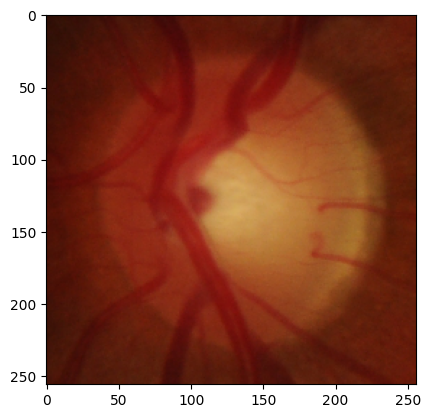

In [34]:
plt.imshow(images[0].numpy().astype("uint8"))

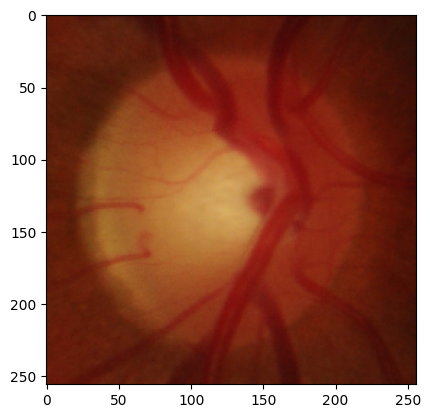

In [32]:
plt.imshow(tf.image.random_flip_left_right(images)[0].numpy().astype("uint8"))

In [36]:
tf.keras.utils.save_img(path='test.png', x=images[0], data_format='channels_last', file_format='png', scale=False)

ValueError: Expected image array to have rank 3 (single image). Got array with shape: (32, 256, 256, 3)

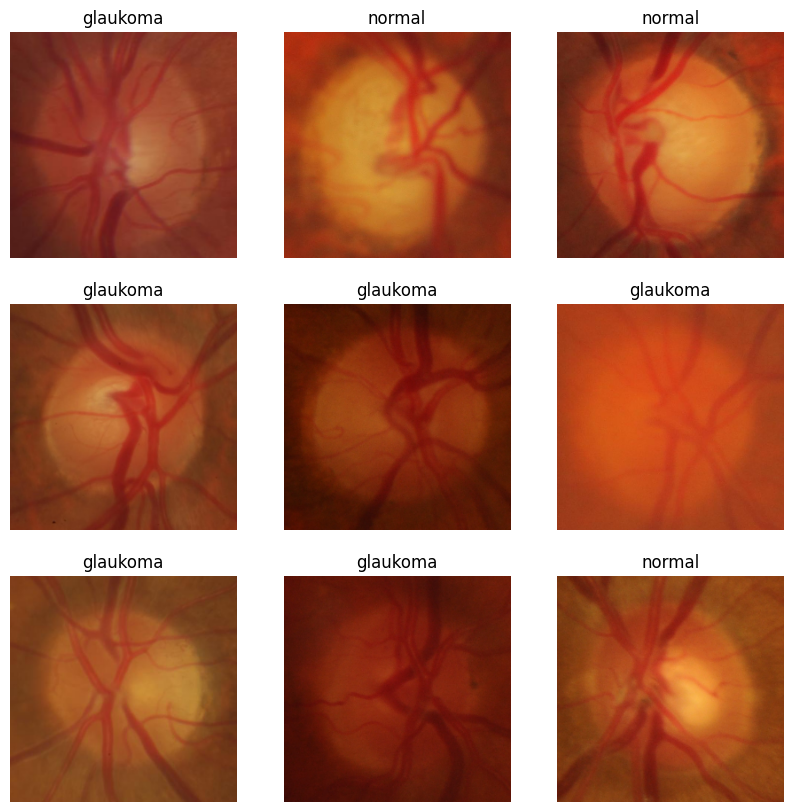

In [24]:
visualize(test_)